In [3]:
%load_ext autoreload
%autoreload 2

In [88]:
import chiscrape
import util
import networkx as nx
import pandas as pd
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
data = pd.read_csv('data_output_2_6_1_14.csv', encoding = 'iso-8859-1', index_col = 0)
unique_domains = pd.read_csv('unique_domains_2_6_1_14.csv', encoding = 'iso-8859-1', index_col = 0)
dead_links = pd.read_csv('dead_links_2_6_1_14.csv', index_col = 0)

In [83]:
data.sort_values(by='num_email_addresses', ascending=False)

,dept,title,url,button,i_want_to,nav,num_email_addresses,email_addresses,pdf_count,pdf_urls,ext_link_count,ext_links,outside_domain,description_words
1536,NaN,\r\n City of Chicago :: Aldermanic Offices\r\n,https://www.cityofchicago.org/city/en/depts/ba...,False,True,True,47,mailto:ward01@cityofchicago.org; mailto:ward02...,1,https://www.cityofchicago.org/content/dam/city...,30,http://aldermanmoreno.com/; http://www.dowellf...,chicago47.org; 50thwardchicago.com; 12thwardch...,aldermen; staff; provide; assistance; business...
3154,-es,\r\n City of Chicago :: Oficinas Municipale...,https://www.cityofchicago.org/city/en/depts/ba...,False,True,True,47,mailto:ward01@cityofchicago.org; mailto:ward02...,1,https://www.cityofchicago.org/content/dam/city...,30,http://aldermanmoreno.com/; http://www.dowellf...,chicago47.org; 50thwardchicago.com; 12thwardch...,los; concejales; su; personal; ofrecen; ayuda;...
2441,NaN,\r\n City of Chicago :: FOIA Contact Inform...,https://www.cityofchicago.org/city/en/narr/foi...,False,True,True,35,mailto:MOfoia@cityofchicago.org; mailto:311foi...,0,NaN,5,http://chicityclerk.com/office-info/foia/; htt...,chicagocitytreasurer.com; ilga.gov; illinoisat...,foia; requests; must; submitted; directly; app...
3693,_info,\r\n City of Chicago :: Technical Assistanc...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,26,mailto:ghennings@pcc-chgo.org; mailto:ghenning...,0,NaN,0,NaN,NaN,technical; assistance-community; former; housi...
2536,_info,\r\n City of Chicago :: Foreclosure Prevent...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,15,mailto:dwilliams@bethelnewlife.com; mailto:mwo...,1,https://www.cityofchicago.org/content/dam/city...,13,http://www.bethelnewlife.org; http://www.thech...,picbchicago.org; nwshc.org; caslservice.org; n...,foreclosure; prevention; housing; counseling; ...
5306,o_generated,\r\n City of Chicago :: Innovation and Tech...,https://www.cityofchicago.org/city/en/depts/do...,False,True,True,14,mailto:laticia.latham@cityofchicago.org; mailt...,0,NaN,0,NaN,NaN,danielle; dumerer; cio; commissioner; danielle...
2743,_info,\r\n City of Chicago :: Independent Living ...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,13,mailto:jsgonsja@bync.org; mailto:Drennie@bicke...,0,NaN,0,NaN,NaN,small; accessible; repairs; seniors; sarfs; ag...
3568,NaN,\r\n City of Chicago :: Small Business Deve...,https://www.cityofchicago.org/city/en/depts/ba...,False,True,True,8,mailto:info@bethelnewlife.org; mailto:i-conda@...,0,NaN,12,http://www.illinois.gov/dceo/SmallBizAssistanc...,illinois.gov; worldbusinesschicago.com; amlega...,sbdcs; provide; businesses; free; professional...
1789,-es,\r\n City of Chicago :: Centros de Desarrol...,https://www.cityofchicago.org/city/en/depts/ba...,False,True,True,8,mailto:info@bethelnewlife.org; mailto:i-conda@...,0,NaN,12,http://www.illinois.gov/dceo/SmallBizAssistanc...,illinois.gov; worldbusinesschicago.com; amlega...,los; sbdc; ofrecen; los; negocios; guía; profe...
1887,_info,\r\n City of Chicago :: Chicago Film Office...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,8,mailto:filmoffice@cityofchicago.org; mailto:kj...,0,NaN,13,http://www.transitchicago.com/film.aspx; http:...,millenniumpark.org; chicagoparkdistrict.com; t...,dcase; homepage; film; office; services/contac...


In [36]:
unique_city_of_chicago = list(unique_domains[unique_domains.domain_url.str.contains('.cityofchicago.')].domain_url.unique())

In [64]:
unique_city_of_chicago.remove('dev.cityofchicago.org.s3-website-us-east-1.amazonaws.com')

In [65]:
unique_city_of_chicago.sort()
unique_city_of_chicago


['311api.cityofchicago.org',
 '311request.cityofchicago.org',
 'author.cityofchicago.org',
 'cfdforms.cityofchicago.org',
 'chicagoimagegallery.cityofchicago.org',
 'chitext.cityofchicago.org',
 'cityinfo.cityofchicago.org',
 'climatechange.cityofchicago.org',
 'committeeonspecialevents.cityofchicago.org',
 'committeeonthebudget.cityofchicago.org',
 'data.cityofchicago.org',
 'datadictionary.cityofchicago.org',
 'digital.cityofchicago.org',
 'egov.cityofchicago.org',
 'energymap.cityofchicago.org',
 'eprocurement.cityofchicago.org',
 'erequest.cityofchicago.org',
 'ess-pay.cityofchicago.org',
 'gisapps.cityofchicago.org',
 'ipiweb.cityofchicago.org',
 'm.cityofchicago.org',
 'maps.cityofchicago.org',
 'mayor.cityofchicago.org',
 'mayorsphotogallery.cityofchicago.org',
 'owa.cityofchicago.local',
 'parkingtickets.cityofchicago.org',
 'planreview.cityofchicago.org',
 'servicerequest.cityofchicago.org',
 'servicetracker.cityofchicago.org',
 'taxprep.cityofchicago.org',
 'techplan.cityofch

In [67]:
unique_city_of_chicago = unique_city_of_chicago[:-1]
len(unique_city_of_chicago)

32

In [68]:
edges = []
for url in unique_city_of_chicago:
    edges.append(('cityofchicago.org',url))

In [69]:
edges

[('cityofchicago.org', '311api.cityofchicago.org'),
 ('cityofchicago.org', '311request.cityofchicago.org'),
 ('cityofchicago.org', 'author.cityofchicago.org'),
 ('cityofchicago.org', 'cfdforms.cityofchicago.org'),
 ('cityofchicago.org', 'chicagoimagegallery.cityofchicago.org'),
 ('cityofchicago.org', 'chitext.cityofchicago.org'),
 ('cityofchicago.org', 'cityinfo.cityofchicago.org'),
 ('cityofchicago.org', 'climatechange.cityofchicago.org'),
 ('cityofchicago.org', 'committeeonspecialevents.cityofchicago.org'),
 ('cityofchicago.org', 'committeeonthebudget.cityofchicago.org'),
 ('cityofchicago.org', 'data.cityofchicago.org'),
 ('cityofchicago.org', 'datadictionary.cityofchicago.org'),
 ('cityofchicago.org', 'digital.cityofchicago.org'),
 ('cityofchicago.org', 'egov.cityofchicago.org'),
 ('cityofchicago.org', 'energymap.cityofchicago.org'),
 ('cityofchicago.org', 'eprocurement.cityofchicago.org'),
 ('cityofchicago.org', 'erequest.cityofchicago.org'),
 ('cityofchicago.org', 'ess-pay.cityofc

In [70]:
len(edges)

32

In [71]:
G = nx.Graph()

In [72]:
for edge in edges:
    G.add_edge(*edge)

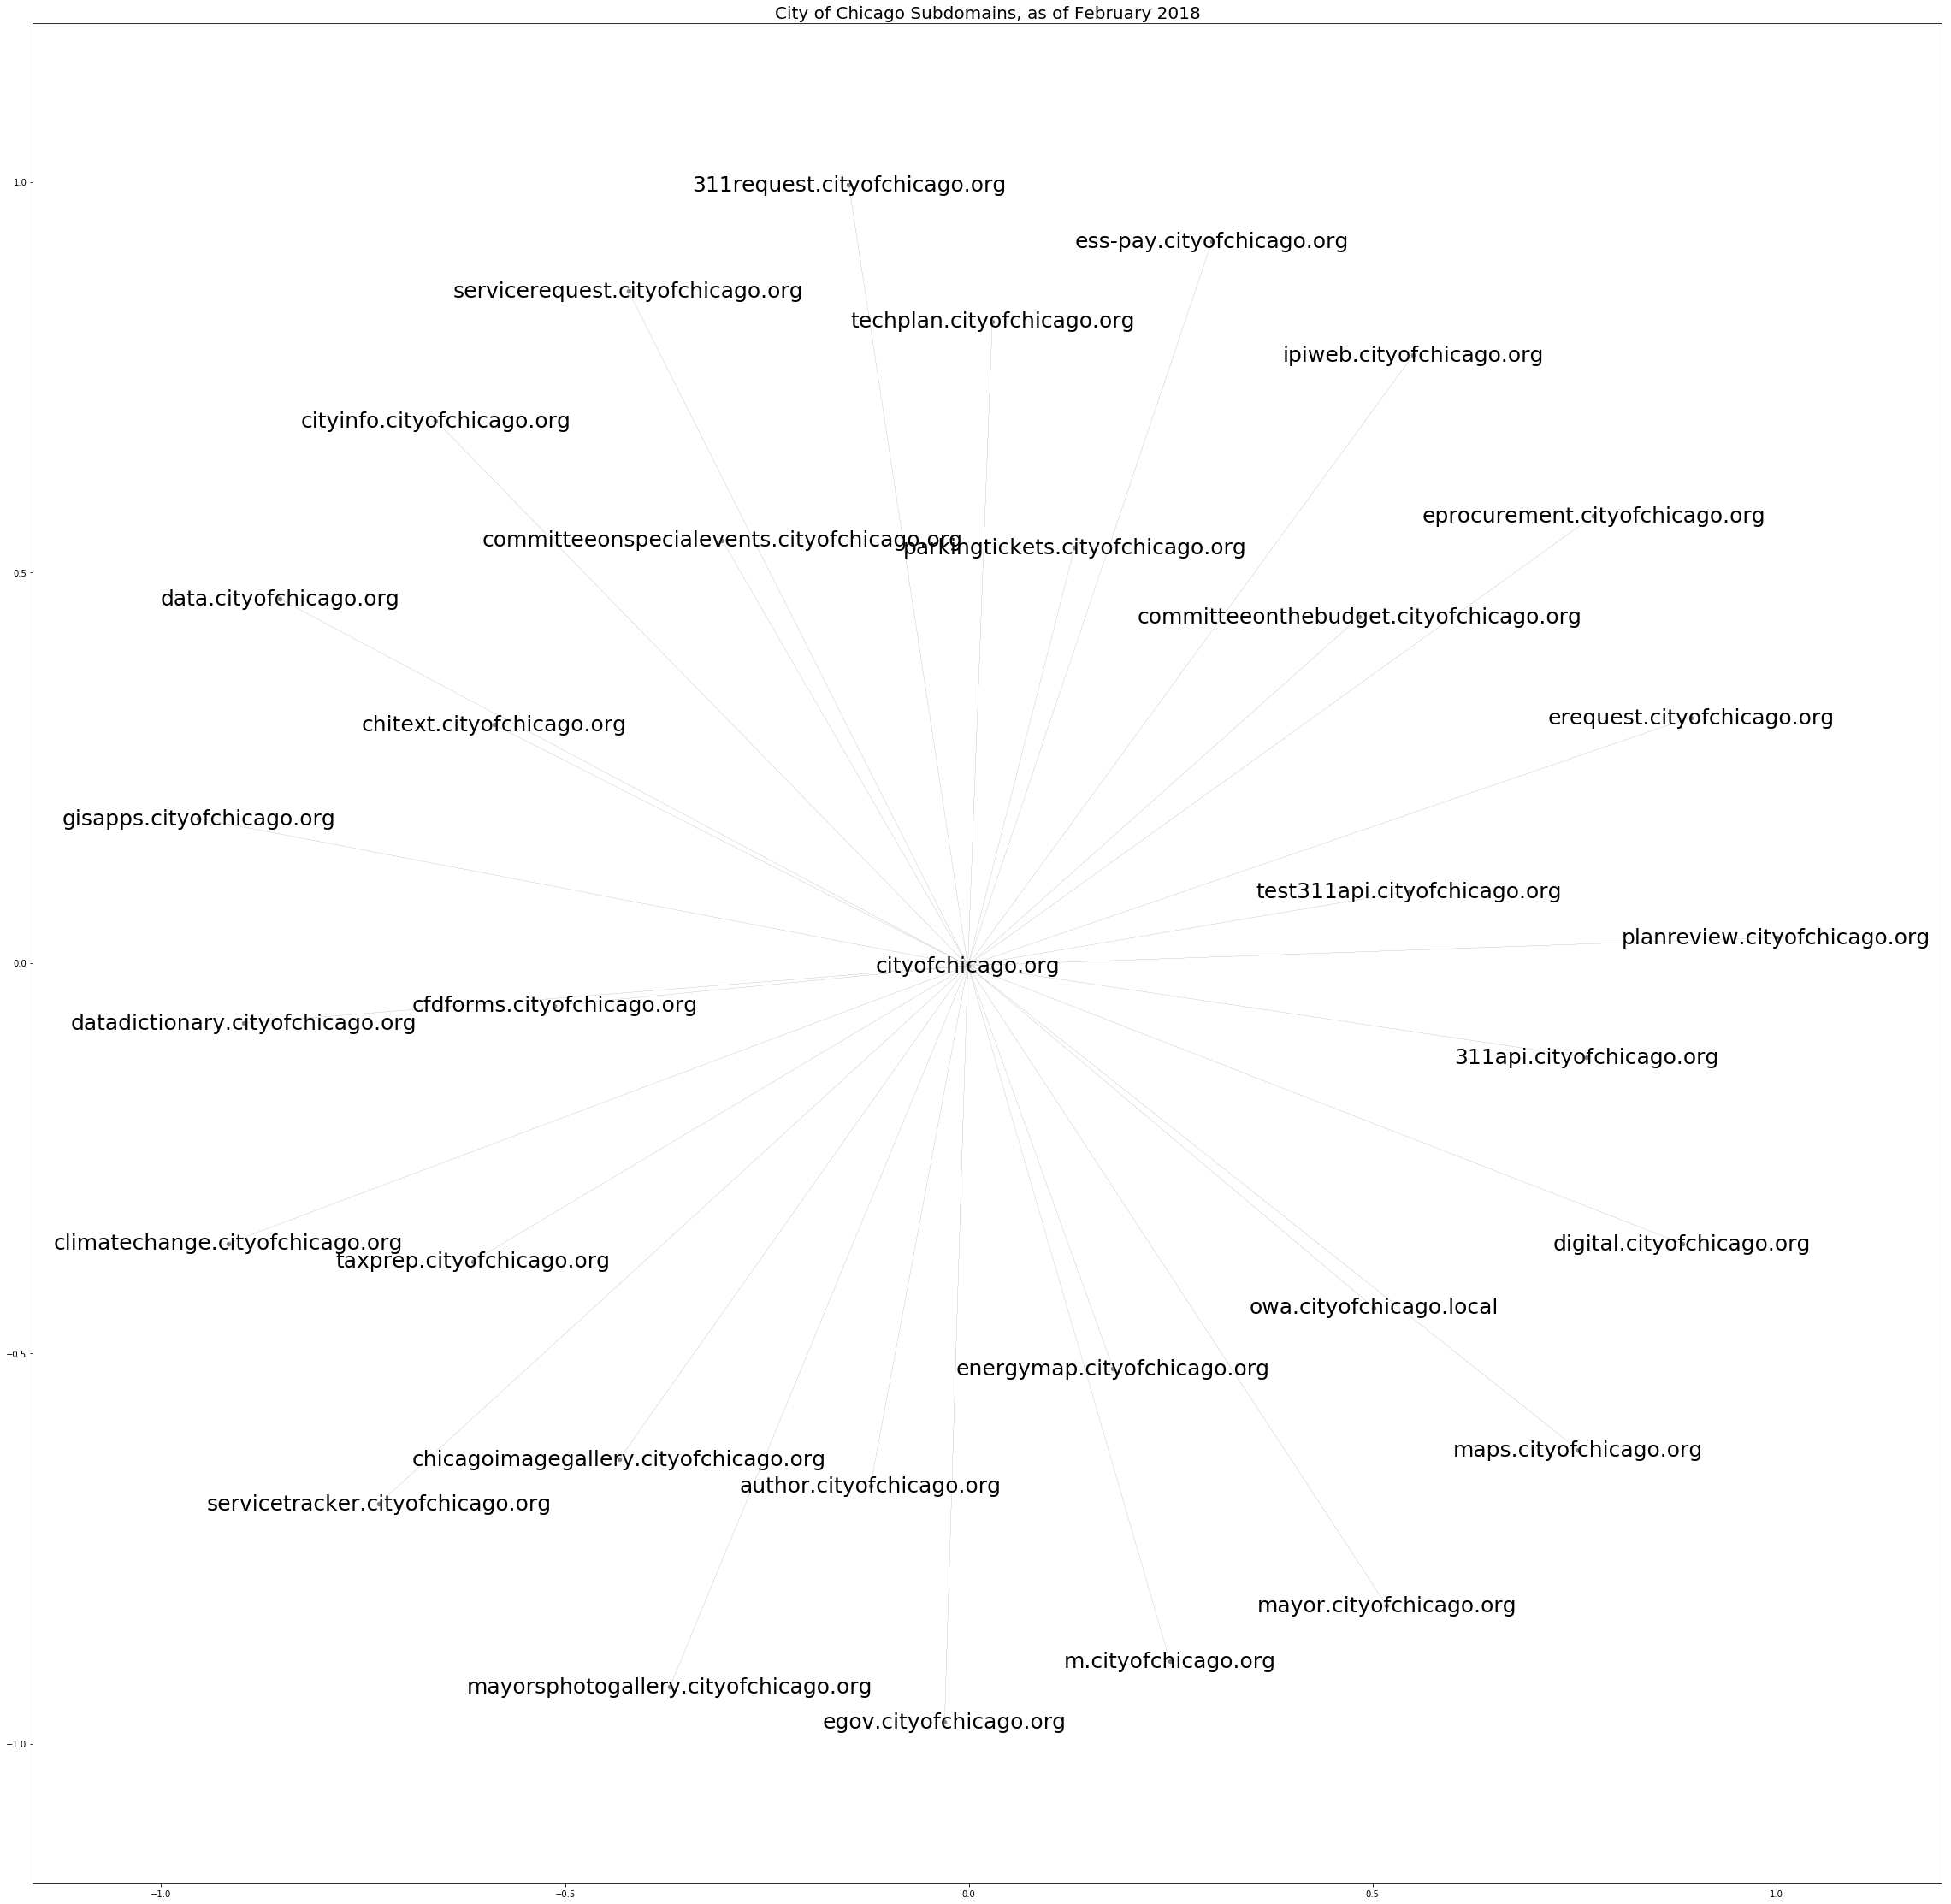

In [84]:
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, node_color = 'gray', edge_color = 'black', width = 0.1, node_size = 20, with_labels = True, font_size=25)
#nx.draw_networkx_labels(G, label_list, fontsize = .5)
plt.rcParams["figure.figsize"] = [40,40]
plt.title("City of Chicago Subdomains, as of February 2018", fontsize = 20)
plt.savefig("cityofchicago_urls.png")

In [90]:
data.sort_values(by = 'pdf_count', ascending=False)

,dept,title,url,button,i_want_to,nav,num_email_addresses,email_addresses,pdf_count,pdf_urls,ext_link_count,ext_links,outside_domain,description_words
5293,_info,\r\n City of Chicago :: Job Specification A...,https://www.cityofchicago.org/city/en/depts/dh...,False,True,True,0,NaN,1102,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,No text found
3367,p_info,\r\n City of Chicago :: Public Vehicle Indu...,https://www.cityofchicago.org/city/en/depts/ba...,False,True,True,0,NaN,580,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,public; vehicle; industry; notices; pv; notice...
3595,_info,\r\n City of Chicago :: Special Service Are...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,0,NaN,472,https://www.cityofchicago.org/content/dam/city...,48,http://www.chicagoloopalliance.com; http://www...,whpdevelopmentcouncil.net; northcenterchamber....,citywide; ssa; map; ssa; state; streetchicago;...
1260,pp_info,\r\n City of Chicago :: 2012 Water and Sewe...,https://www.cityofchicago.org/city/en/depts/wa...,False,True,True,0,NaN,421,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,december; start; dates; water; sewer; construc...
3979,_info,\r\n City of Chicago :: ZBA Resolutions - 1...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,3,mailto:Joyce.Beal@cityofchicago.org; mailto:Vi...,412,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,decisions; decisions; januaryfebruarymarchapri...
1935,p_info,\r\n City of Chicago :: Chicago Liquor Lice...,https://www.cityofchicago.org/city/en/depts/ba...,False,True,True,0,NaN,405,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,plan; operation; w.; jackson; blvd; plan; oper...
2210,p_info,\r\n City of Chicago :: Current Flu Situati...,https://www.cityofchicago.org/city/en/depts/cd...,False,True,True,0,NaN,201,https://www.cityofchicago.org/content/dam/city...,5,https://visitor.r20.constantcontact.com/manage...,cookcountyclerk.com; illinoispandemicflu.org; ...,state; national; flu; information; resources; ...
3800,upp_info,\r\n City of Chicago :: View Statements of ...,https://www.cityofchicago.org/city/en/depts/et...,False,True,True,0,NaN,193,https://www.cityofchicago.org/content/dam/city...,1,http://webapps1.cityofchicago.org/efis/search_...,webapps1.cityofchicago.org,board; ethics; pleased; post; statements; fina...
1491,upp_info,\r\n City of Chicago :: Advisory Opinions -...,https://www.cityofchicago.org/city/en/depts/et...,False,True,True,0,NaN,185,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,page; links; text; formal; advisory; opinions;...
3649,_info,\r\n City of Chicago :: TIF District Redeve...,https://www.cityofchicago.org/city/en/depts/dc...,False,True,True,0,NaN,175,https://www.cityofchicago.org/content/dam/city...,0,NaN,NaN,links; provide; histories; goals; eligible; re...


In [105]:
data[(data.url.str.contains('/fin/'))]

,dept,title,url,button,i_want_to,nav,num_email_addresses,email_addresses,pdf_count,pdf_urls,ext_link_count,ext_links,outside_domain,description_words
23,drs,\r\n City of Chicago :: Pay or Search for P...,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,0,NaN,1,https://parkingtickets.cityofchicago.org/CPSWe...,parkingtickets.cityofchicago.org,search; pay; parking; tickets; red; light; tic...
37,drs,\r\n City of Chicago :: Administrative Hear...,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,1,https://www.cityofchicago.org/content/dam/city...,1,https://webapps1.cityofchicago.org/ezpay/ah,webapps1.cityofchicago.org,administrative; notice; violation/citation; an...
39,drs,\r\n City of Chicago :: Business Taxes\r\n,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,0,NaN,3,http://www.amlegal.com/library/il/chicago.shtm...,webapps1.cityofchicago.org; amlegal.com; ezdec...,welcome; webtax; welcome; finance; electronic;...
45,drs,\r\n City of Chicago :: View Automated Spee...,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,0,NaN,1,https://www.violationinfo.com/Chicago/,violationinfo.com,view; video; automated; speed; enforcement; vi...
68,drs,\r\n City of Chicago :: View Parking Ticket...,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,0,NaN,1,http://chicago.duncan-usa.com/ImageOnlySites/C...,chicago.duncan-usa.com,may; view; pictures; parking; ticket; violatio...
72,drs,\r\n City of Chicago :: View Red Light Vide...,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,0,NaN,2,HTTP://www.ChicagoPhotoCiteWeb.com/; http://we...,ChicagoPhotoCiteWeb.com; webapps1.cityofchicag...,view; video; red; light; violation; need; ente...
79,drs,\r\n City of Chicago :: Apply for Voluntary...,https://www.cityofchicago.org/city/en/depts/fi...,True,True,True,0,NaN,1,https://www.cityofchicago.org/content/dam/city...,1,https://webapps1.cityofchicago.org/VoluntaryDi...,webapps1.cityofchicago.org,tax; voluntary; disclosure; pursuant; section;...
104,drs,\r\n City of Chicago :: Garbage Fee\r\n,https://www.cityofchicago.org/city/en/depts/fi...,False,False,True,0,NaN,0,NaN,0,NaN,NaN,residences; receive; garbage; collection; serv...
160,drs,\r\n City of Chicago :: Enter into Utility ...,https://www.cityofchicago.org/city/en/depts/fi...,False,True,True,0,NaN,0,NaN,5,https://webapps1.cityofchicago.org/WaterPaymen...,iwcc.il.gov; hhs.gov; usda.gov; webapps1.cityo...,NaN
161,_info,\r\n City of Chicago :: Payment Plan Option...,https://www.cityofchicago.org/city/en/depts/fi...,False,True,True,0,NaN,0,NaN,8,https://parkingtickets.cityofchicago.org/Payme...,iwcc.il.gov; usda.gov; parkingtickets.cityofch...,finance; offers; payment; plan; options; vehic...


In [ ]:
edges = []
for edge0 in range(len(edge_0)):
    for edge1 in edge_1[edge0]:
        edges.append((edge_0[edge0], edge1.strip()))
    

In [ ]:
edge_1 = []
for x in data.outside_domain:
    try:
        edge_1.append(x.split(';'))
        
    except:
        edge_1.append([])

In [ ]:
def url_netloc(url):
    parsed_url = urllib.parse.urlparse(url)
    netloc = parsed_url.netloc
    return netloc

In [ ]:
from_domains = set()
for url in data.url:
    parsed_url = urllib.parse.urlparse(url)
    netloc = parsed_url.netloc
    from_domains.add(netloc)

In [ ]:
unique_domains = set()
for x in data.outside_domain:
    try:
        domains = x.split(';')
        for domain in domains:
            stripped = domain.strip()
            unique_domains.add(stripped)
    except:
        pass